# Importing libraries or data

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn import metrics
#from sklearn.cluster import KMeans
#from sklearn.cluster import AgglomerativeClustering
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
#from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
#from sklearn import metrics
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\GEETA\\Untitled Folder 10'

Read/write/manipulate Data

In [2]:

data=pd.read_csv("Churn.csv")   #read csv
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data=data.drop('customerID',axis=1) #drop customerId column
data=data.drop('Churn',axis=1) #drop customerId column


In [5]:
data[data.iloc[:,:]==' '] = np.NaN            #initialize empty spaces with NaN

In [6]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [7]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [8]:
data=data.fillna(data.mean())

In [9]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [10]:
le = preprocessing.LabelEncoder()   #can be used to normalize labels.
for i in data.columns:
    data[i]=le.fit_transform(data[i])   # calculating the means of columns from some data and
                                         #then replacing the missing values

In [11]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674


In [12]:
y=data.iloc[:,-1]
X=data.iloc[:,0:-1]                  

In [ ]:
#selecting those features which contribute most to your prediction variable or output.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=100, step=10, verbose=5)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

In [ ]:
t=["Partner",'Dependents','tenure','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','TechSupport','PaymentMethod','TotalCharges']

In [ ]:
# it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1
x=data.loc[:,t]
scaler = StandardScaler()
X=scaler.fit_transform(X)
x=scaler.fit_transform(x)

# Data Visualization

In [16]:
X

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.13176632, -1.55971787],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.38773977,  0.26850167],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.51731743, -1.32179184],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.14221613, -0.94636309],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.23297901, -1.00198217],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.4723266 ,  1.56988499]])

In [17]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

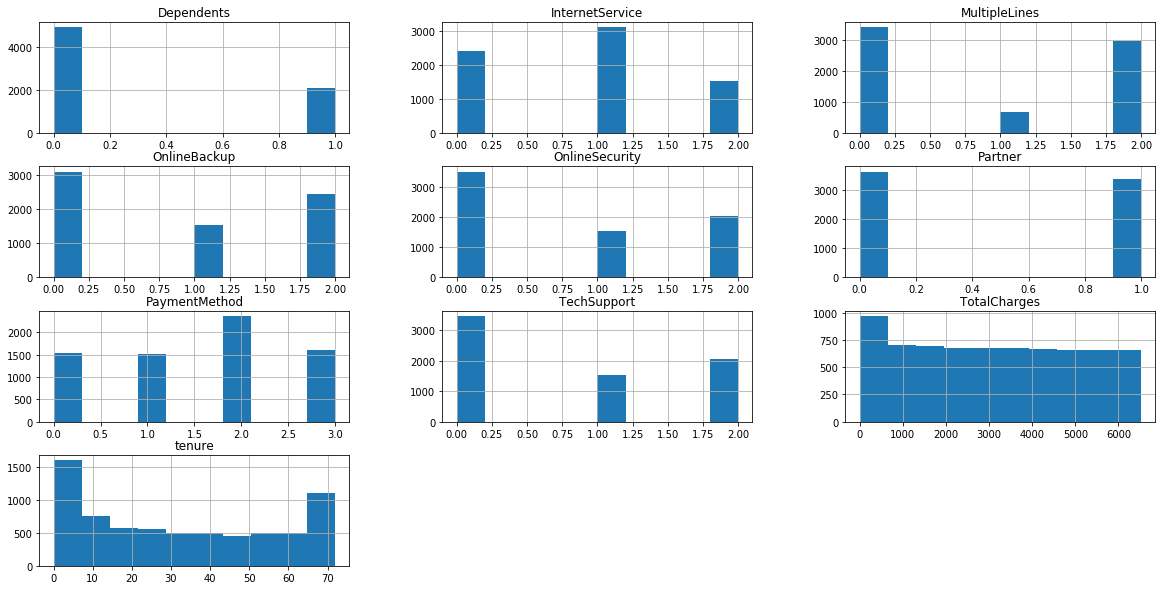

In [18]:
#Plot the histogram
data[t].hist(figsize=(20, 10));

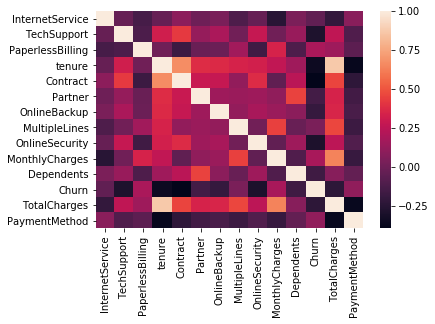

In [52]:
# Drop non-numerical variables
numerical = list(set(data.columns) -
                 set(["gender",'SeniorCitizen','PhoneService','DeviceProtection','StreamingTV','StreamingMovies']))
# Calculate and plot
corr_matrix = data[numerical].corr()
#plot the correlation matrix
sns.heatmap(corr_matrix);

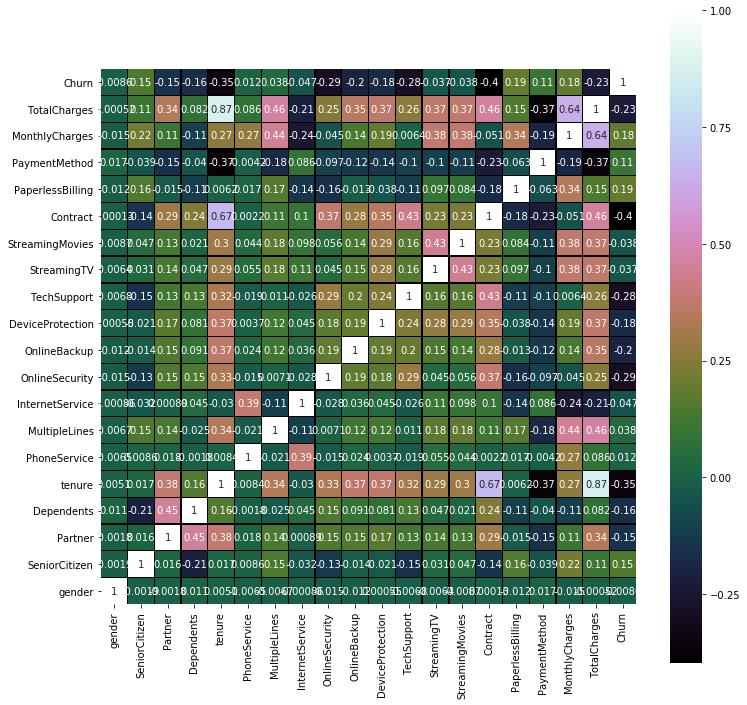

In [62]:
#correlation with each and every column
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
ax.invert_yaxis()

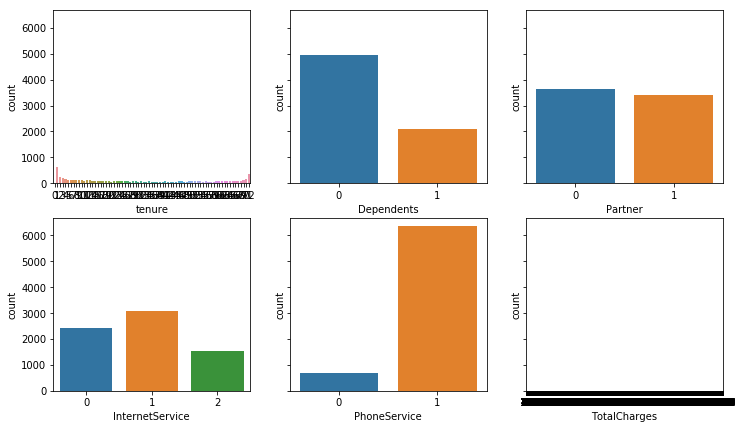

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("tenure", data=data, ax=axes[0,0])
sns.countplot("Dependents", data=data, ax=axes[0,1])
sns.countplot("Partner", data=data, ax=axes[0,2])
sns.countplot("InternetService", data=data, ax=axes[1,0])
sns.countplot("PhoneService", data=data, ax=axes[1,1])
sns.countplot("TotalCharges", data=data, ax=axes[1,2])

C:\Users\GEETA\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


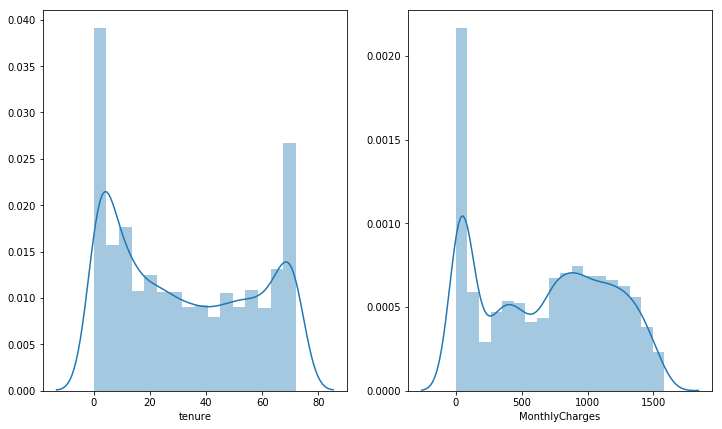

In [64]:
#we saw imbalance or no plotting in tenure and monthlyCharges because they are continous values
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(data["tenure"], ax=axes[0])
sns.distplot(data["MonthlyCharges"], ax=axes[1])

# Model Implementation

SVM MODEL

In [29]:
#implementing SVM model
f1 = []
acc = []
n = 50
print(" Implementing SVM:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    svm = SVC(kernel='linear') 
    svm.fit(X_train, y_train) 
    ypred = svm.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
acc_svm=np.max(acc)*100
print(acc_svm)

 Implementing SVM:
81.97303051809794


ADABOOST MODEL

In [31]:
#implementing adaboost model
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn  import ensemble
scoring = 'accuracy'
adaboost =ensemble.AdaBoostClassifier()
adaboost.fit(X_train, y_train)
kfold = model_selection.KFold(n_splits=10, random_state=7)
acc_adb = cross_val_score(estimator = adaboost, X = X_train, y = y_train, cv = kfold, scoring=scoring)
print("accuracy of adaboost",acc_adb.mean()*100)

accuracy of adaboost 79.80083897056043


DECISION_TREE_CLASSIFIER MODEL

In [32]:
#implementing DecisionTree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_dec1 = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = kfold,scoring=scoring)
print("accuracy of DecissionTree",acc_dec1.mean()*100)

accuracy of DecissionTree 72.04486476953504


SGD CLASSIFIER 

In [34]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
acc_sgd = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = kfold,scoring=scoring)
print("accuracy of DecissionTree",acc_sgd.mean()*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


accuracy of DecissionTree 72.36385624126072


LOGISTIC REGRESSION

In [35]:
n = 150
print("Logistic:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    lr.fit(X_train, y_train)
    ypred=lr.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
acc_log=np.max(acc)*100
print(acc_log)

Logistic:
82.91528632276385


RANDOM FOREST CLASSIFIER

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 2)
random_forest.fit(X_train, y_train)
acc_rdm = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = kfold,scoring=scoring)
print("accuracy of DecissionTree",acc_rdm.mean()*100)

accuracy of DecissionTree 72.75862068965517


# Confusion matrix 

accuracy:   82.111
confusion matrix [[1437  135]
 [ 243  298]]


Text(26.5, 0.5, 'true values')

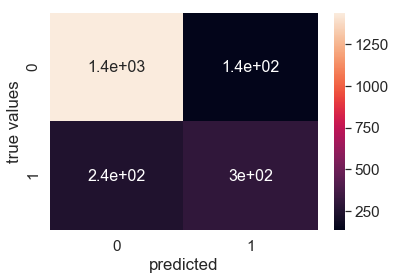

In [65]:
#RANDOM FOREST
score = metrics.accuracy_score(y_test, ypred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, ypred, labels=[0,1])
print("confusion matrix",cm)
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})
#sns.set_axis_labels('true values','predicted')
plt.xlabel("predicted")
plt.ylabel("true values")

# table-wise Accuracy

In [66]:
models_cross = pd.DataFrame({
    'Model': ['AdaBoost','Support Vector Machines','Stochastic Gradient Decent','Logistic Regression', 
              'Random Forest','Decision Tree'],
    'Accuracy_Percentage': [acc_adb.mean()*100,acc_svm,acc_sgd.mean()*100, acc_log, 
              acc_rdm.mean()*100,acc_dec1.mean()*100]})
models_cross.sort_values(by='Accuracy_Percentage', ascending=True)

,Model,Accuracy_Percentage
5,Decision Tree,72.044865
2,Stochastic Gradient Decent,72.363856
4,Random Forest,72.758621
0,AdaBoost,79.800839
1,Support Vector Machines,81.973031
3,Logistic Regression,82.915286


# Feature Importance

In [118]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
acc_xgb = cross_val_score(estimator = decision_tree, X = X_train, y = y_train, cv = kfold,scoring=scoring)

In [119]:
y_pred = xgb_model.predict(X_test)

In [120]:
1/(1+np.exp(-0.032))

0.5079993174032311

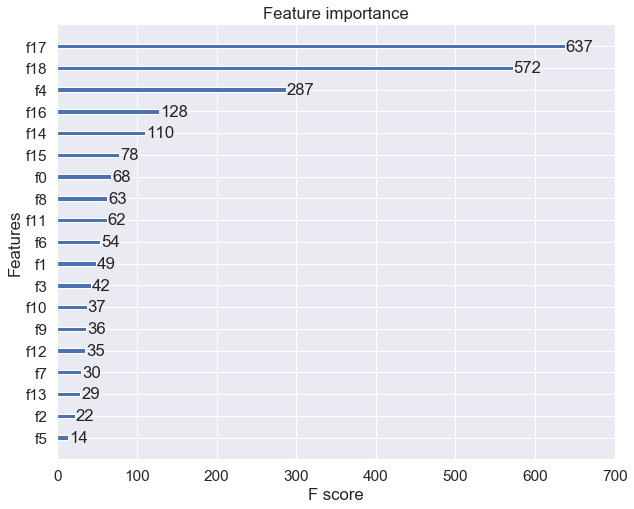

In [121]:
fig, ax = plt.subplots(figsize=(10,8))
xgb_model.feature_importances_
plot_importance(xgb_model, ax=ax)

In [122]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
(pd.Series(model.feature_importances_, index=data.columns).nlargest(4).plot(kind='barh'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Length of passed values is 19, index implies 20